## **IMPORTING THE LIBRARIES**



---



**IMPORTING THE DATA SCIENCE LIBRARIES**

In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import time

**IMPORTING THE ML / SCIKIT LEARN EVERYTHING**

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [27]:
from sklearn.model_selection import train_test_split               #for splitting the data into test and training data
from sklearn.compose import ColumnTransformer                       #for transforming the columns
from sklearn.impute import SimpleImputer                             #for imputing the missing values
from sklearn.preprocessing import OneHotEncoder                      #one hot encoding
from sklearn.preprocessing import MinMaxScaler                        #standard scaling
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
from scipy import stats

from sklearn.datasets import load_diabetes

from sklearn.datasets import make_regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.svm import SVR
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import make_classification

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score                 # for accuracy score
from sklearn.model_selection import cross_val_score        # for cross validation score

from sklearn.linear_model import LinearRegression           # Import the LinearRegression class
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error    # to find out the error functions
from sklearn.preprocessing import PolynomialFeatures , StandardScaler   # for the polunomial features
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge   # ridge Regression
from sklearn.linear_model import LogisticRegression


from sklearn.tree import DecisionTreeClassifier                 #Decision tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier   # bagging and Boosting
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score   # different metrices to check how our model performed

**IMPORTING DEEP LEARNING EVERYTHING**

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

**IMPORTING MATHEMATICAL MODELS**

In [1]:
# prompt: import the mathematical testing framewroks

# Importing mathematical models
import math

from scipy import stats
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import StackingClassifier
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.datasets import make_circles
%matplotlib inline



---



### **LOADING THE DATA**

In [6]:
from google.colab import files
uploaded = files.upload()

Saving hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv to hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv


In [7]:
df= pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')



---



### **INFORMATION ABOUT THE DATA**

In [8]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.shape

(200, 5)

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


There is no null data present in our Dataset



---



### **DATA PREPROCESSING**

In [13]:
df.duplicated().sum()

0

**REMOVING OUTLIER**

In [14]:
#we will make a function removing outliers
def remove_outliers(df,columns):
    for col in columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        IQR=q3-q1
        low_bound=q1-1.5*IQR
        upp_bound=q3-1.5*IQR
        df=df[(df[col]>=low_bound)&(df[col]<=upp_bound)]
        return df
#in columns we will take a variable to put the columns we need to remove outliers from.
numerical_columns= [
    'GRE Score','TOEFL Score','SOP','LOR','CGPA','Chance of Admit'
]


numerical_columns = [col for col in numerical_columns if col in df.columns]

data = remove_outliers(df,numerical_columns)

In [18]:
data = df.iloc[:,3:5].values

In [19]:
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

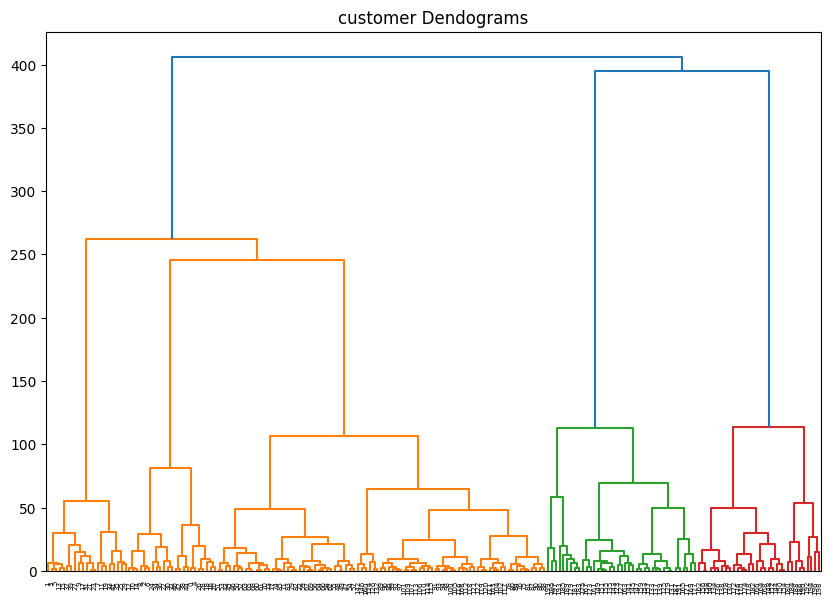

In [22]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,7))
plt.title("customer Dendograms")
dend = sch.dendrogram(sch.linkage(data,method='ward'))

In [28]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean',linkage='ward')
labels=cluster.fit_predict(data)

In [29]:
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

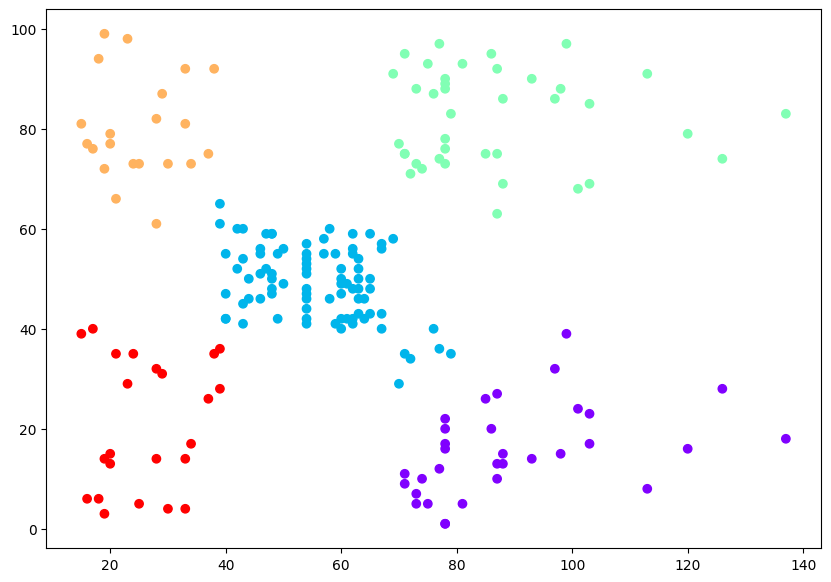

In [30]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')